In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from sklearn import datasets
from sklearn.datasets import load_svmlight_file
import scipy.sparse

from optimization import *
from oracles import *
from plot_trajectory_2d import *

In [15]:
warnings.filterwarnings("ignore")

In [16]:
np.random.seed(42)

## Эксперимент №1

In [17]:
# Определяем матрицы с высоким, низким и средним числом обусловленности
high_cond = np.array([[1.0, 0.5], [0.5, 10.0]])  
low_cond = np.array([[1.0, 0.1], [0.1, 1.0]]) 
medium_cond = np.array([[1.0, 0.3], [0.3, 5.0]])  # ([[2.0, 0.3], [0.3, 3.0]]) 

# Вычисляем и выводим число обусловленности для каждой матрицы
high_cond_number = np.linalg.cond(high_cond) 
low_cond_number = np.linalg.cond(low_cond)
medium_cond_number = np.linalg.cond(medium_cond)  

# Печатаем результаты
print(f'Число обусловленности для high_cond: {high_cond_number}')
print(f'Число обусловленности для low_cond: {low_cond_number}')
print(f'Число обусловленности для medium_cond: {medium_cond_number}')

Число обусловленности для high_cond: 10.313294180487771
Число обусловленности для low_cond: 1.2222222222222225
Число обусловленности для medium_cond: 5.137321598715684


Число обусловленности = 10.31, Начальная точка = 0, Метод = Constant, Итерации = 241


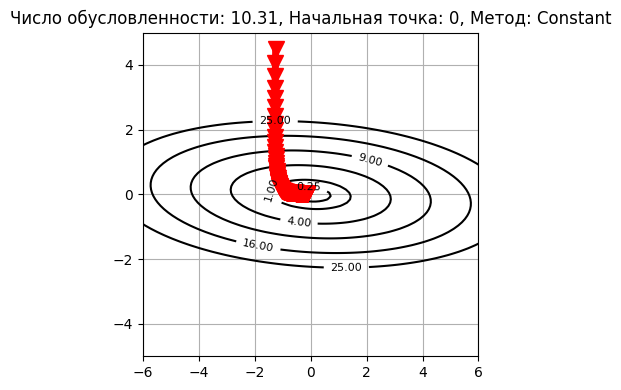

Число обусловленности = 10.31, Начальная точка = 0, Метод = Armijo, Итерации = 15


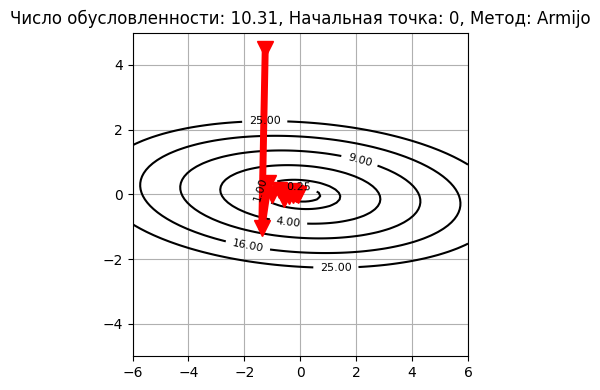

Число обусловленности = 10.31, Начальная точка = 0, Метод = Wolfe, Итерации = 4


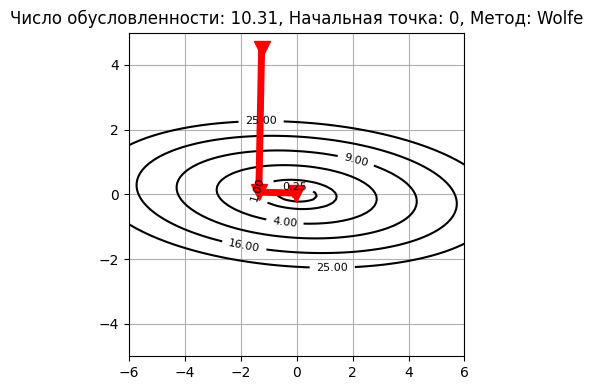

Число обусловленности = 10.31, Начальная точка = 1, Метод = Constant, Итерации = 422


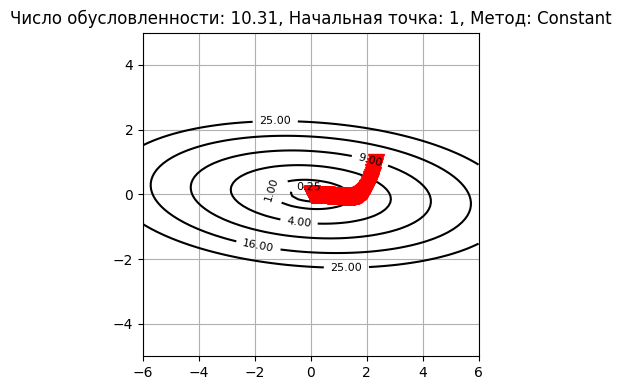

Число обусловленности = 10.31, Начальная точка = 1, Метод = Armijo, Итерации = 23


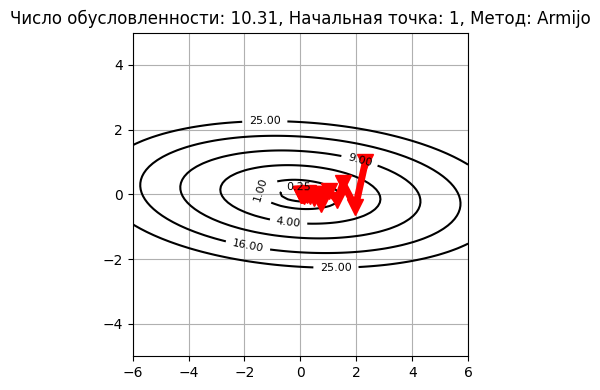

Число обусловленности = 10.31, Начальная точка = 1, Метод = Wolfe, Итерации = 5


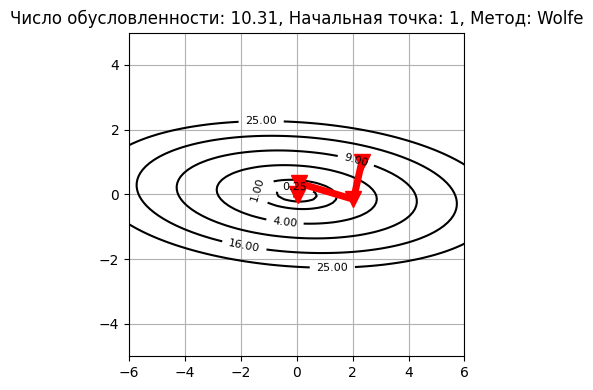

Число обусловленности = 10.31, Начальная точка = 2, Метод = Constant, Итерации = 340


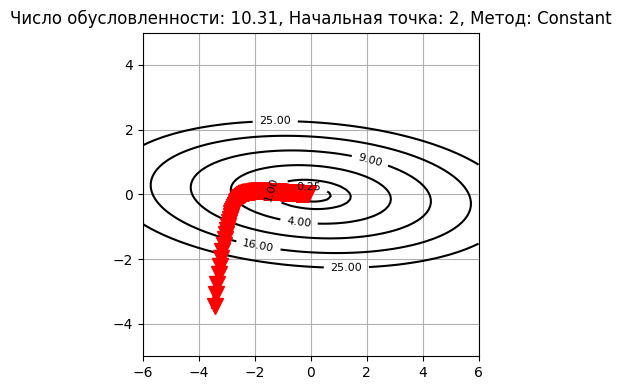

Число обусловленности = 10.31, Начальная точка = 2, Метод = Armijo, Итерации = 19


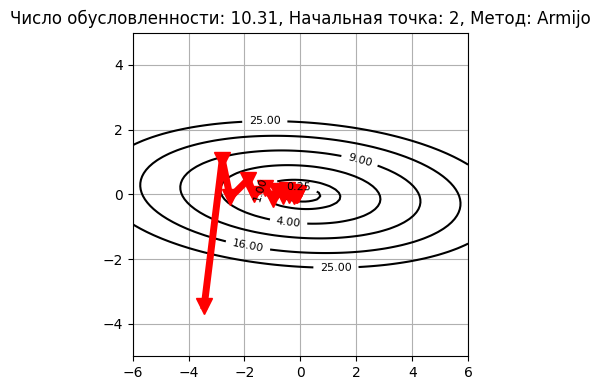

Число обусловленности = 10.31, Начальная точка = 2, Метод = Wolfe, Итерации = 6


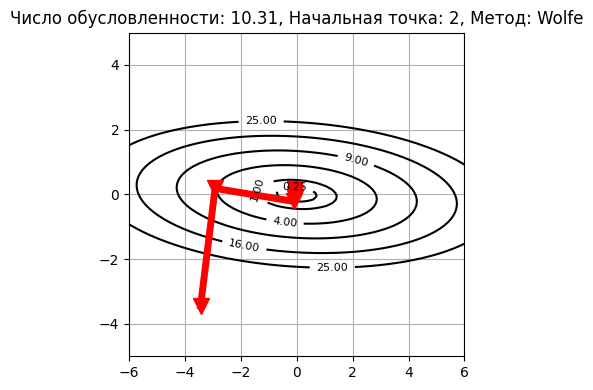

Число обусловленности = 1.22, Начальная точка = 0, Метод = Constant, Итерации = 638


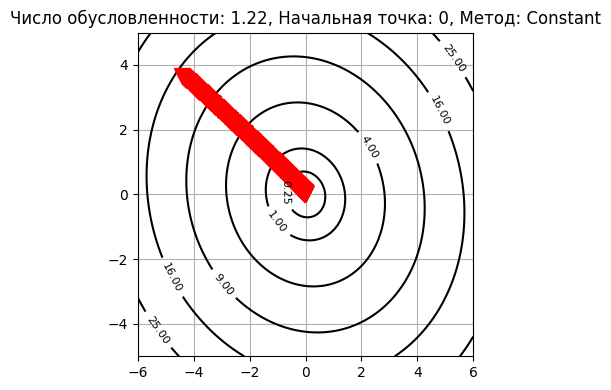

Число обусловленности = 1.22, Начальная точка = 0, Метод = Armijo, Итерации = 10


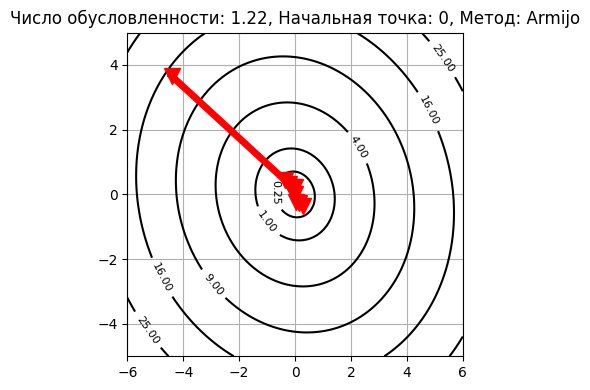

Число обусловленности = 1.22, Начальная точка = 0, Метод = Wolfe, Итерации = 4


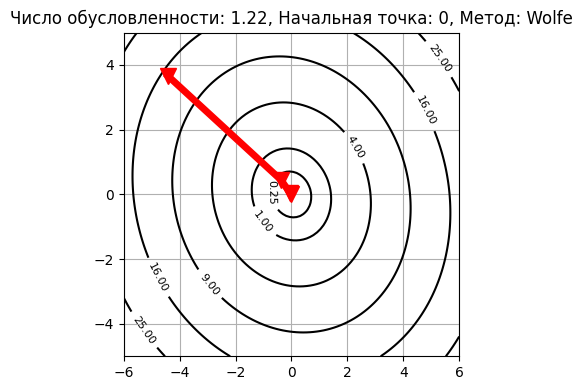

Число обусловленности = 1.22, Начальная точка = 1, Метод = Constant, Итерации = 543


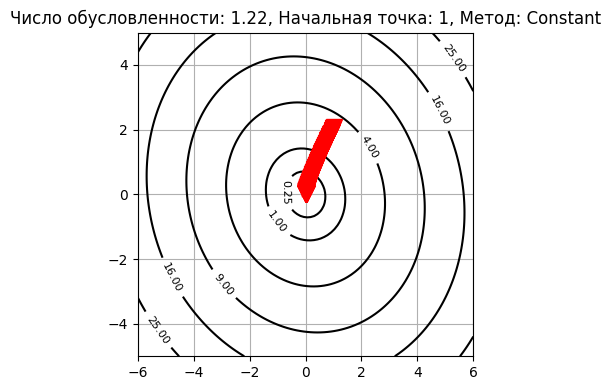

Число обусловленности = 1.22, Начальная точка = 1, Метод = Armijo, Итерации = 4


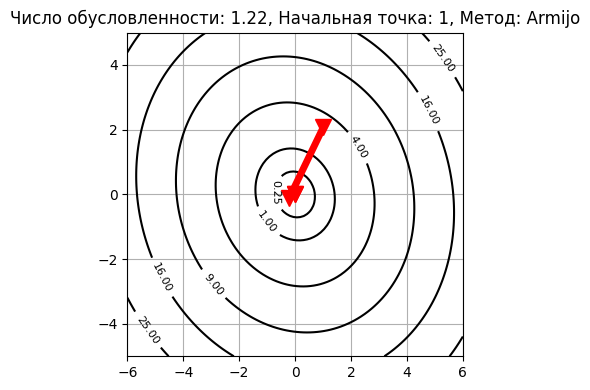

Число обусловленности = 1.22, Начальная точка = 1, Метод = Wolfe, Итерации = 4


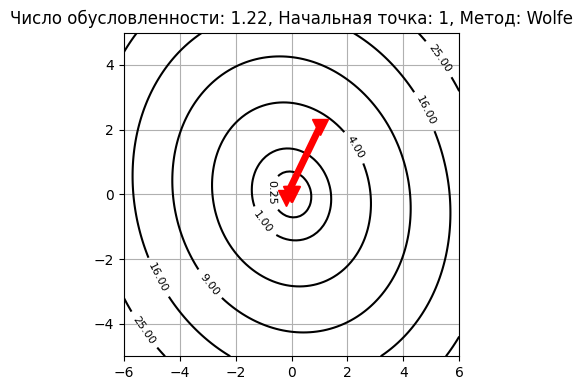

Число обусловленности = 1.22, Начальная точка = 2, Метод = Constant, Итерации = 638


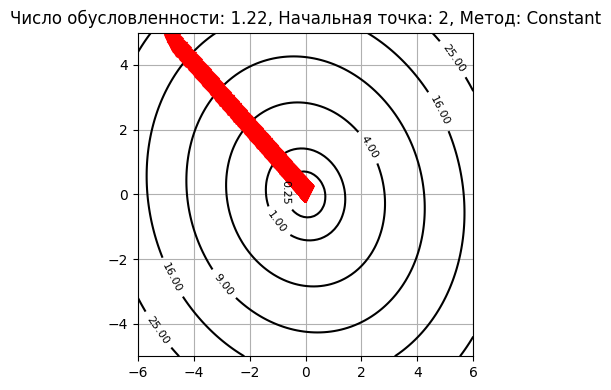

Число обусловленности = 1.22, Начальная точка = 2, Метод = Armijo, Итерации = 14


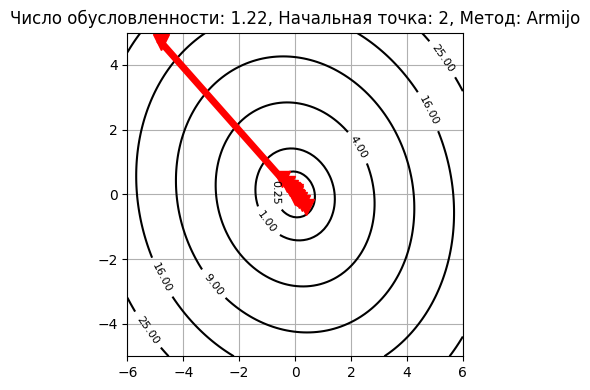

Число обусловленности = 1.22, Начальная точка = 2, Метод = Wolfe, Итерации = 4


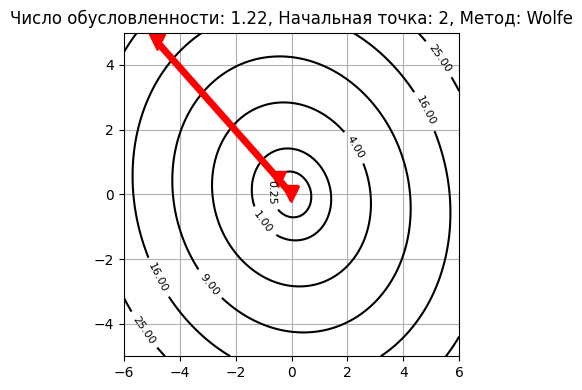

Число обусловленности = 5.14, Начальная точка = 0, Метод = Constant, Итерации = 448


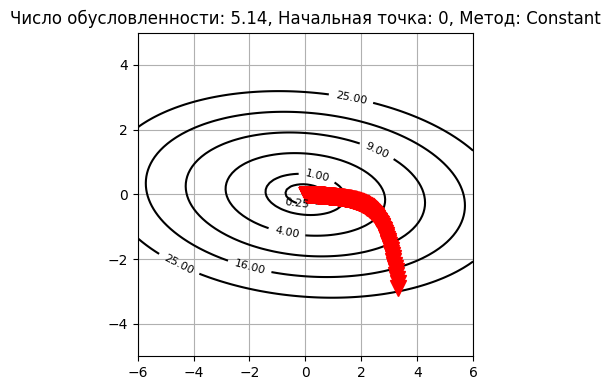

Число обусловленности = 5.14, Начальная точка = 0, Метод = Armijo, Итерации = 12


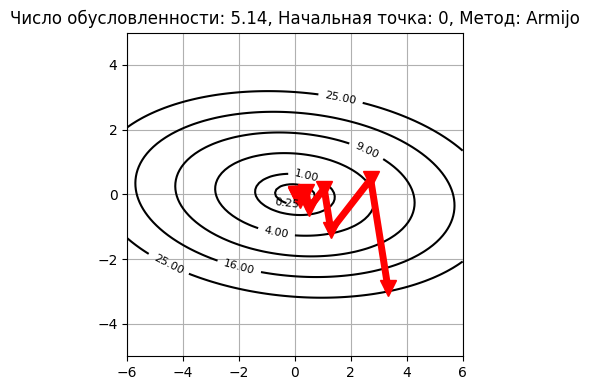

Число обусловленности = 5.14, Начальная точка = 0, Метод = Wolfe, Итерации = 5


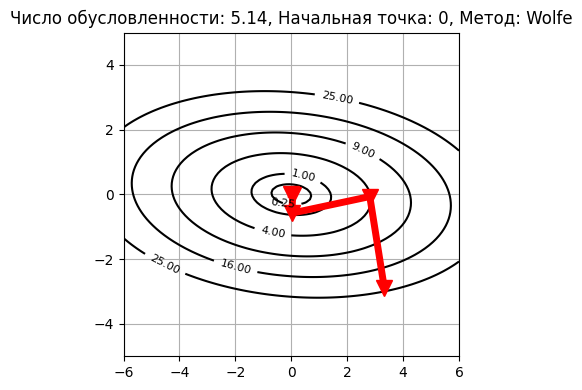

Число обусловленности = 5.14, Начальная точка = 1, Метод = Constant, Итерации = 405


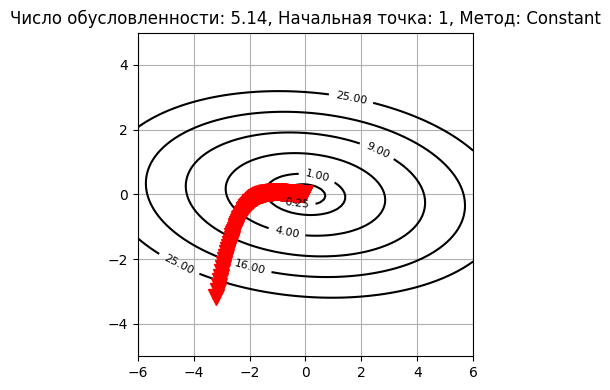

Число обусловленности = 5.14, Начальная точка = 1, Метод = Armijo, Итерации = 11


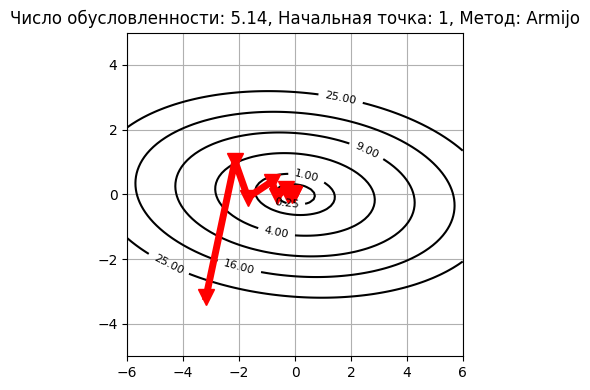

Число обусловленности = 5.14, Начальная точка = 1, Метод = Wolfe, Итерации = 4


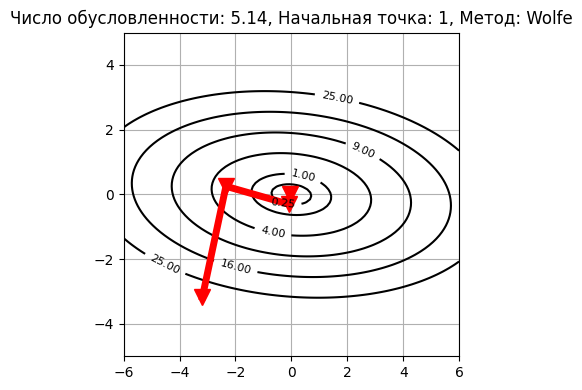

Число обусловленности = 5.14, Начальная точка = 2, Метод = Constant, Итерации = 584


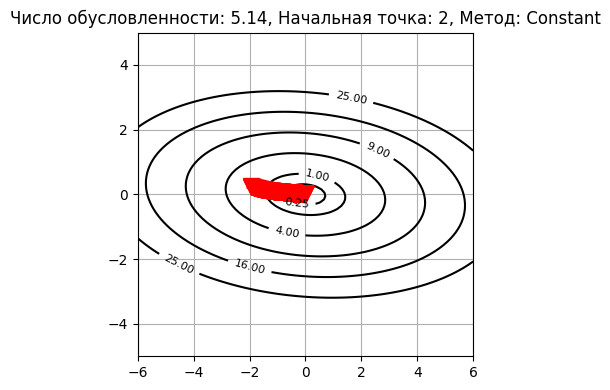

Число обусловленности = 5.14, Начальная точка = 2, Метод = Armijo, Итерации = 9


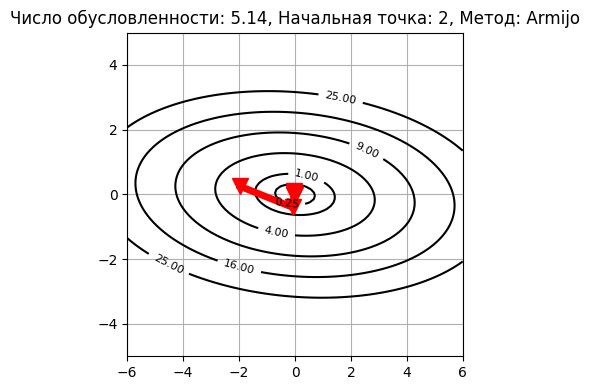

Число обусловленности = 5.14, Начальная точка = 2, Метод = Wolfe, Итерации = 4


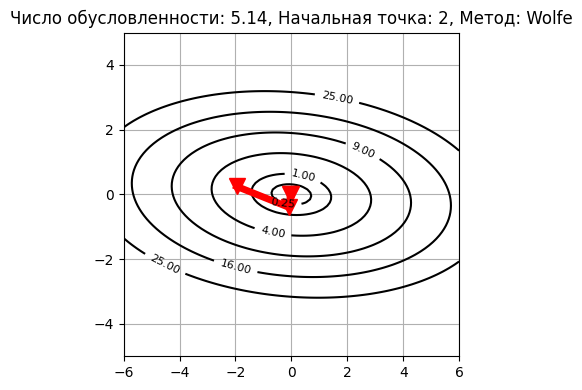

In [18]:
# Итерация по матрицам с высоким и низким числом обусловленности
for i, A in enumerate([high_cond, low_cond, medium_cond]):
    # Вычисление числа обусловленности для текущей матрицы
    cond_num = np.linalg.cond(A)

    # Генерация трех случайных начальных точек в диапазоне от -5 до 5
    start_points = [np.random.uniform(-5, 5, size=2) for _ in range(3)]
    
    # Определение методов градиентного спуска
    methods = ['Constant', 'Armijo', 'Wolfe']
    
    # Создание оракула для текущей матрицы
    oracle = QuadraticOracle(A, np.zeros(2))

    # Итерация по каждой начальной точке
    for j, x_0 in enumerate(start_points):
        # Итерация по каждому методу градиентного спуска
        for method in methods:
            # Выполнение градиентного спуска и получение конечной точки, сообщения и истории
            x_star, msg, history = gradient_descent(
                oracle, 
                x_0, 
                line_search_options={'method': method, 'c': 0.01}, 
                trace=True
            )
            
            # Вывод информации о числе обусловленности, начальной точке и количестве итераций
            print(f'Число обусловленности = {round(cond_num, 2)}, Начальная точка = {j}, Метод = {method}, Итерации = {len(history["x"])}')
            
            # Создание нового графика для каждого метода и начальной точки
            plt.figure(figsize=(4, 4))
            plot_levels(oracle.func)  # Построение контурных линий функции
            plot_trajectory(oracle.func, history['x'])  # Построение траектории оптимизации
            plt.title(f'Число обусловленности: {round(cond_num, 2)}, Начальная точка: {j}, Метод: {method}')  # Заголовок графика
            plt.tight_layout()
            plt.show()  # Отображение графика

## Эксперимент №2

Задаем параметры для размерностей пространства, цветов линий и меток для графиков

'Мощностей железа не хватает на отображение больших размерностей пространства'

In [30]:
n_dim = [10, 100, 1000]  # Размерности пространства 
labels = ['n = 10', 'n = 100', 'n = 1000']  
colors = ['g', 'b', 'r'] 
options = list(zip(n_dim, colors, labels))  # Объединяем параметры для итерации
cond_numbers = np.arange(1, 501, 100)  # Числа обусловленности от 1 до 1000 с шагом 50
seeds = np.random.randint(1, 30000, 5)

Итерация по каждому набору размерностей, цветов и меток

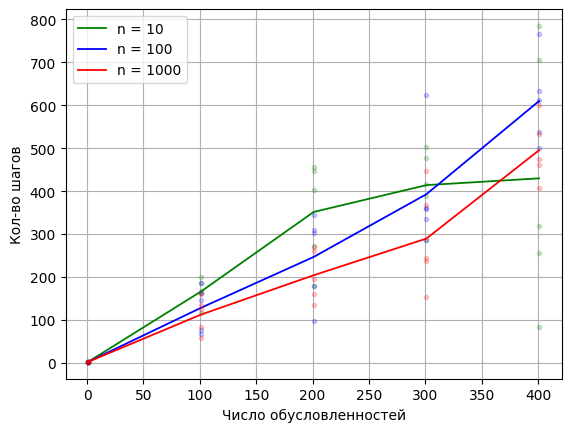

In [35]:
for n, color, label in options:
    y = np.zeros(len(cond_numbers))  # Массив для хранения среднего количества шагов
    for seed in seeds:  # Итерация по каждому случайному числу для генерации данных
        np.random.seed(seed)  # Устанавливаем seed для генерации случайных чисел
        y_curr = []  # Временный массив для текущего расчета шагов
        for c in cond_numbers:  # Проходим по каждому числу обусловленности
            # Генерация диагональной матрицы с диагональю от 1 до c
            diag = np.random.uniform(1, c, size=n)
            diag[0] = 1  # Первое значение фиксируем как 1
            diag[-1] = c  # Последнее значение фиксируем как число обусловленности c
            A, b = scipy.sparse.diags(diag, 0), np.random.rand(n)  # Создаем матрицу A и вектор b
            oracle = QuadraticOracle(A, b)  # Создаем оракул для квадратичной функции
            _, _, history = gradient_descent(oracle, np.zeros(n), trace=True)  # Запуск градиентного спуска
            y_curr.append(len(history['time']))  

        y += np.array(y_curr)  # Суммируем количество шагов для каждого seed
        plt.plot(cond_numbers, y_curr, color + '.', alpha=0.2)  # Строим график для каждого seed

    # Строим средний график по всем seed для текущего n
    plt.plot(cond_numbers, y / (1. * len(seeds)), color, linewidth=1.3, label=label)
    plt.xlabel('Число обусловленностей') 
    plt.ylabel('Кол-во шагов') 
    plt.grid(linestyle='-') 
    plt.legend(loc='best')



## Эксперимент №3

In [36]:
import os
import bz2

In [37]:
def decompress_file(filepath):
    # Путь для распакованного файла .txt
    newfilepath = filepath.replace('.bz2', '.txt')

    # Декомпрессия файла
    with open(newfilepath, 'wb') as new_file, open(filepath, 'rb') as file:
        decompressor = bz2.BZ2Decompressor()
        for data in iter(lambda: file.read(100 * 1024), b''):
           new_file.write(decompressor.decompress(data))

In [38]:
decompress_file('D:/HSE_ITMO_optimization_methods_course/LAB_1/gisette_scale.bz2')

In [39]:
decompress_file('D:/HSE_ITMO_optimization_methods_course/LAB_1/real-sim.bz2')

In [60]:
# Устанавливаем метки для графиков
labels = ['Градиентный спуск', 'Метод Ньютона']

# Функция для сравнения методов на одном наборе данных
def compare_methods(file_path):
    # Загружаем данные
    A, b = load_svmlight_file(file_path)

    # Уменьшаем размер данных, если необходимо
    if A.shape[0] > 1000:  # этот метод был использован для построения графика gisette
        A = A[:1000, :]
        b = b[:1000]
        
    # Создаем оракулы для обоих методов
    oracle_grad = create_log_reg_oracle(A, b, 1 / b.size)
    oracle_newton = create_log_reg_oracle(A, b, 1 / b.size)

    # Начальная точка
    x0 = np.zeros(A.shape[1])

    # Оптимизация с использованием обоих методов
    _, _, history_grad = gradient_descent(oracle_grad, x0, trace=True)
    _, _, history_newton = newton(oracle_newton, x0, trace=True)

    # Строим график значений функции от времени
    plt.plot(history_grad['time'], history_grad['func'], label=labels[0])
    plt.plot(history_newton['time'], history_newton['func'], label=labels[1])
    plt.xlabel('Время')
    plt.ylabel('Значение функции')
    plt.title(f'Сравнение методов для {file_path.split("/")[-1]}')
    plt.legend()
    plt.grid()
    plt.show()

In [68]:
A, b = load_svmlight_file('D:/HSE_ITMO_optimization_methods_course/LAB_1/w8a.txt')
A.shape

(49749, 300)

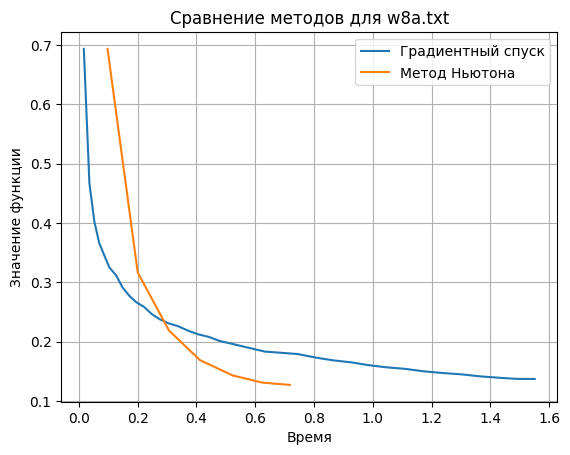

In [41]:
compare_methods('D:/HSE_ITMO_optimization_methods_course/LAB_1/w8a.txt')

In [69]:
A, b = load_svmlight_file('D:/HSE_ITMO_optimization_methods_course/LAB_1/real-sim.txt')
A.shape

(72309, 20958)

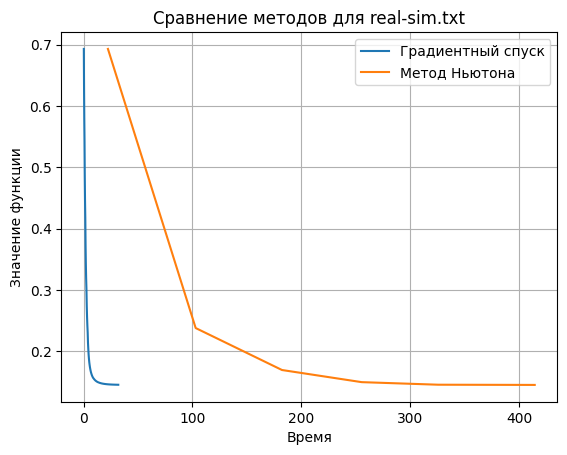

In [42]:
compare_methods('D:/HSE_ITMO_optimization_methods_course/LAB_1/real-sim.txt')

In [65]:
A, b = load_svmlight_file('D:/HSE_ITMO_optimization_methods_course/LAB_1/gisette_scale.txt')
A.shape

(6000, 5000)

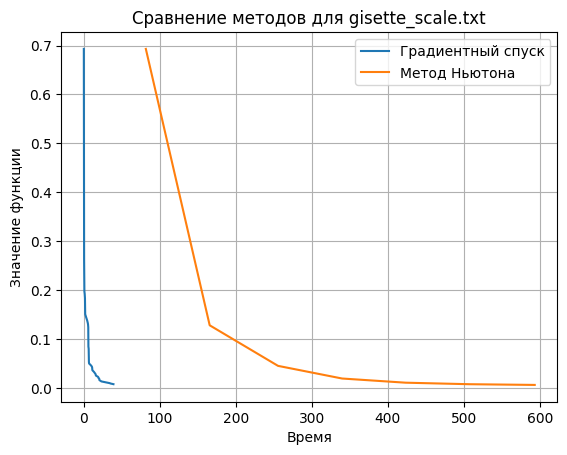

In [61]:
compare_methods('D:/HSE_ITMO_optimization_methods_course/LAB_1/gisette_scale.txt')

## Эксперимент №4

In [50]:
from scipy import sparse

In [56]:
def generate_quadratic(size=500, condition_number=10):
    # Генерирует случайную квадратичную функцию.
    diag = np.random.uniform(1, condition_number, size)
    diag[0] = 1
    diag[-1] = condition_number
    A, b = sparse.diags(diag, 0), np.random.rand(size)
    return A, b


In [57]:
def generate_logistic_regression(m=500, n=500):
    # Генерирует случайные данные для логистической регрессии.
    b = np.random.choice([1, -1], size=n)
    A, _ = datasets.make_classification(m, n)
    return A, b

In [58]:
def run_experiment(model_type, initial_point, experiment_id):
    # Запускает эксперимент с градиентным спуском для заданной модели.
    size = 500

    def compute_y(history, criterion):
        # Вычисляет логарифмическую относительную невязку
        if criterion == 'function':
            func_values = np.array(history['func'])
            return np.log(func_values / func_values[0])
        else:
            grad_norms = np.square(np.array(history['grad_norm']))
            return np.log(grad_norms / grad_norms[0])
        
    constant_steps = [0.001, 0.01, 0.1, 0.5, 1, 10]
    c1_values = [0.0001, 0.1, 0.3]
    c2_values = [0.001, 0.1, 0.9]
    
    if model_type == 'quadratic':
        A, b = generate_quadratic(size=size)
        oracle = QuadraticOracle(A, b)
        criterion = 'function'
    else:
        A, b = generate_logistic_regression()
        oracle = create_log_reg_oracle(A, b, 1. / b.size)
        criterion = 'grad_norm'
    
    # Постоянный шаг
    plt.figure()
    plt.xlabel('Итерации')
    if criterion == 'function':
        ylabel = '''Логарифм от отношения 
        функции f(x_k) к функции f(x_0)'''
    else:
        ylabel = '''Логарифм отношения 
        квадратичных норм градиентов 
        функции f в точках x_k и x_0'''
    # ylabel = 'Логарифм от отношения функции 𝑓(𝑥_𝑘) к функции 𝑓(𝑥_0)' if criterion == 'function' else 'Логарифм отношения квадратичных норм градиентов функции 𝑓 в точках 𝑥_𝑘 и 𝑥_0',
    plt.ylabel(ylabel)
    plt.ylim([-15, 0])
    plt.title('Постоянный шаг')

    for step in constant_steps:
        _, msg, history = gradient_descent(oracle, initial_point, trace=True, 
                                           line_search_options={'method': 'Constant', 'c': step})
        print(f'Постоянный шаг {step}: {msg}, итераций {len(history["time"])}')
        iterations = np.arange(len(history[criterion]))
        y_values = compute_y(history, criterion)
        plt.plot(iterations, y_values, label=f'c = {step}')

    plt.legend()
    plt.grid()
    
    # Метод Армихо и условия Вульфа
    plt.figure()
    plt.xlabel('Итерации')
    plt.ylabel(ylabel)
    plt.title('Методы Армихо и Вульфа')
    plt.ylim([-15, 0])

    for c1 in c1_values:
        _, msg, history = gradient_descent(oracle, initial_point, trace=True, 
                                           line_search_options={'method': 'Armijo', 'c1': c1})
        print(f'Армихо {c1}: {msg}, итераций {len(history["time"])}')
        iterations = np.arange(len(history[criterion]))
        y_values = compute_y(history, criterion)
        plt.plot(iterations, y_values, label=f'Armijo, c1 = {c1}')

    for c2 in c2_values:
        _, msg, history = gradient_descent(oracle, initial_point, trace=True, 
                                           line_search_options={'method': 'Wolfe', 'c1': 0.0001, 'c2': c2})
        print(f'Вульфа {c2}: {msg}, итераций {len(history["time"])}')
        iterations = np.arange(len(history[criterion]))
        y_values = compute_y(history, criterion)
        plt.plot(iterations, y_values, label=f'Wolfe, c1 = 1e-4, c2 = {c2}')

    plt.legend()
    plt.grid()

    return initial_point


Постоянный шаг 0.001: iterations_exceeded, итераций 10001
Постоянный шаг 0.01: iterations_exceeded, итераций 10001
Постоянный шаг 0.1: success, итераций 3414
Постоянный шаг 0.5: success, итераций 683
Постоянный шаг 1: success, итераций 341
Постоянный шаг 10: success, итераций 47
Армихо 0.0001: success, итераций 42
Армихо 0.1: success, итераций 40
Армихо 0.3: success, итераций 39
Вульфа 0.001: success, итераций 51
Вульфа 0.1: success, итераций 28
Вульфа 0.9: success, итераций 46
Постоянный шаг 0.001: iterations_exceeded, итераций 10001
Постоянный шаг 0.01: iterations_exceeded, итераций 10001
Постоянный шаг 0.1: iterations_exceeded, итераций 10001
Постоянный шаг 0.5: success, итераций 4194
Постоянный шаг 1: success, итераций 2097
Постоянный шаг 10: success, итераций 209
Армихо 0.0001: success, итераций 71
Армихо 0.1: success, итераций 88
Армихо 0.3: success, итераций 88
Вульфа 0.001: success, итераций 92
Вульфа 0.1: success, итераций 91
Вульфа 0.9: success, итераций 142
Постоянный шаг 0.

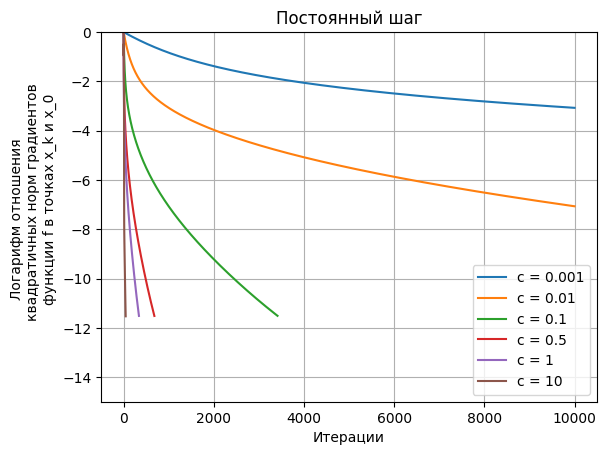

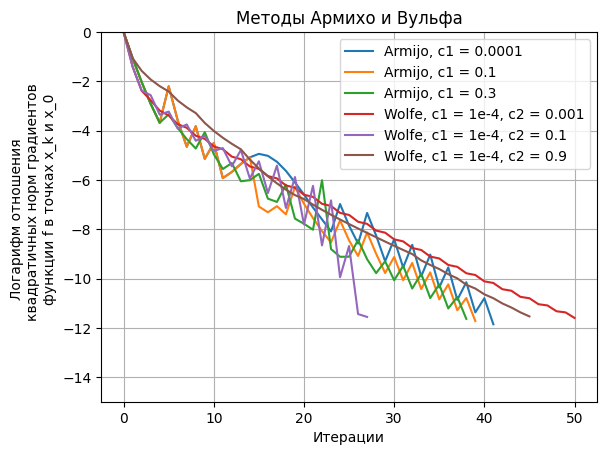

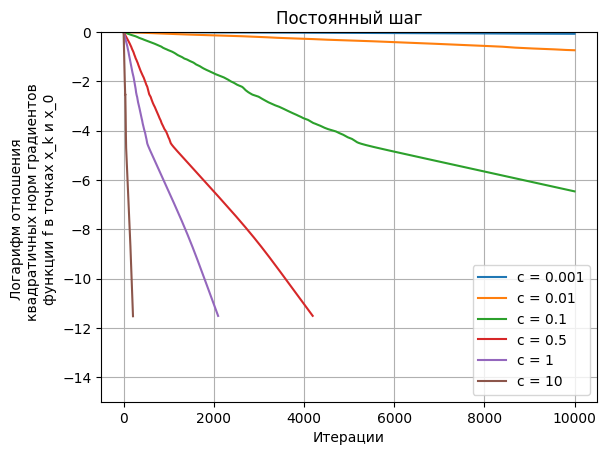

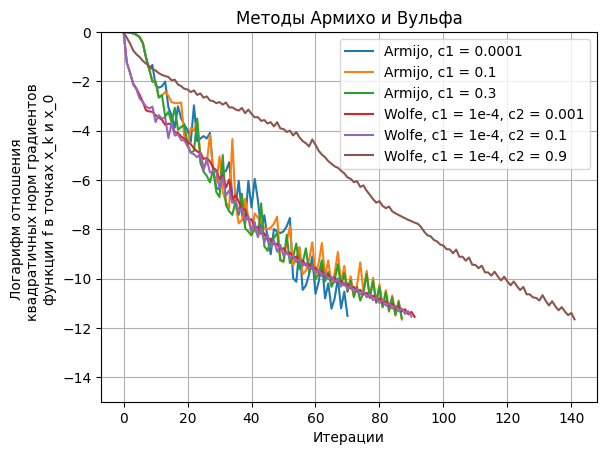

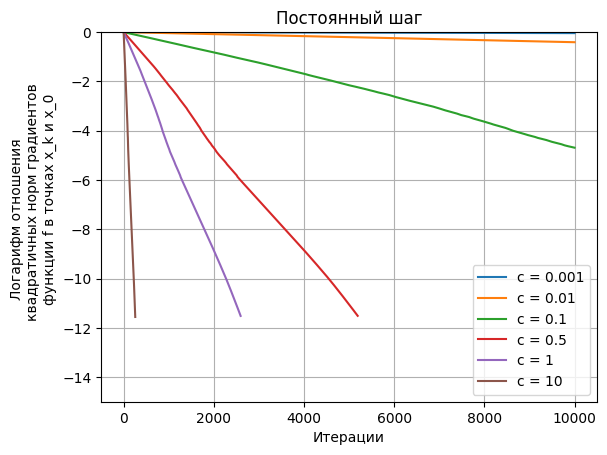

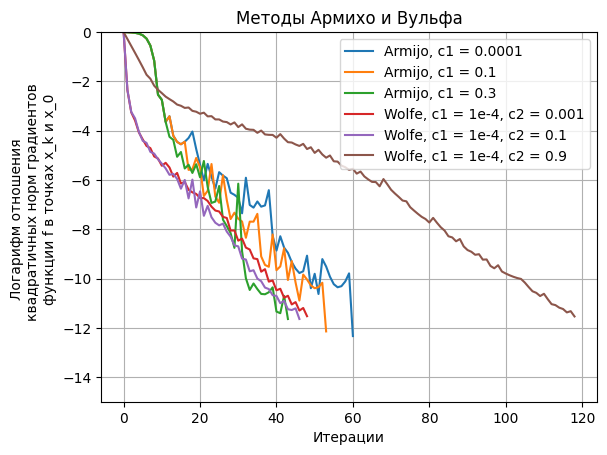

In [59]:
# Начальная точка и запуск экспериментов для логистической регрессии
initial_x0 = np.zeros(500)
experiment_id = 0

initial_x0 = run_experiment('logistic', initial_x0, experiment_id)

initial_x0 += np.random.normal(loc=10, scale=5, size=500)
experiment_id += 1
initial_x0 = run_experiment('logistic', initial_x0, experiment_id)

initial_x0 += np.random.normal(loc=50, scale=5, size=500)
experiment_id += 1
initial_x0 = run_experiment('logistic', initial_x0, experiment_id)